In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models, utils

<module 'utils' from '/home/elliot/ml-final-project/wisconsin/utils.py'>

In [42]:
df = pd.read_csv('breast-cancer-wisconsin.csv').set_index('id')
df.describe()

,thickness,size_uniform,shape_uniform,adhesion,epithelial_size,bare_nuclei,chromatin,normal_nuclei,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [47]:
# 2 is benign, 4 is malignant. We substitute 2 -> 0 and 4 -> 1.
y = df['class'].replace(to_replace=2, value=0).astype('bool')
X = df.drop('class', axis=1)

# Mean-center and normalize
for col in X:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

In [48]:
X.describe()

,thickness,size_uniform,shape_uniform,adhesion,epithelial_size,bare_nuclei,chromatin,normal_nuclei,mitoses
count,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.248391e-16,4.161304e-17,-6.241957e-17,6.241957e-17,-2.080652e-17,-2.080652e-17,5.201631e-17,4.161304e-17,9.362935e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.220297e+00,-7.016978e-01,-7.412304e-01,-6.388973e-01,-1.005027e+00,-6.983413e-01,-9.981216e-01,-6.124785e-01,-3.481446e-01
25%,-8.657829e-01,-7.016978e-01,-7.412304e-01,-6.388973e-01,-5.552016e-01,-6.983413e-01,-5.899078e-01,-6.124785e-01,-3.481446e-01
50%,-1.567545e-01,-7.016978e-01,-7.412304e-01,-6.388973e-01,-5.552016e-01,-6.983413e-01,-1.816940e-01,-6.124785e-01,-3.481446e-01
75%,5.522740e-01,6.032977e-01,5.971975e-01,4.083832e-01,3.444489e-01,6.738310e-01,6.347336e-01,3.702689e-01,-3.481446e-01
max,1.970331e+00,2.234542e+00,2.270232e+00,2.502944e+00,3.043400e+00,1.771569e+00,2.675803e+00,2.335764e+00,4.846139e+00


In [183]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
def knn(nbors, split):
    X_train, X_val, y_train, y_val = split
    neigh = KNeighborsClassifier(n_neighbors=nbors)
    neigh.fit(X_train, y_val)
    return neigh.predict_proba(X_test)

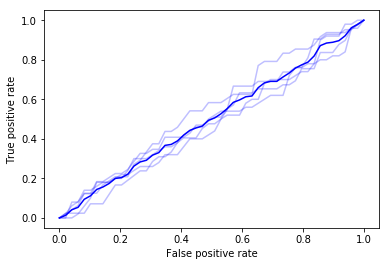

AUC for the random model: 0.5002148299319727


In [184]:
curves = utils.cross_validate(X, y, models.random)
utils.plot_roc_curves(curves)
print(f'AUC for the random model: {utils.auc(curves)}')

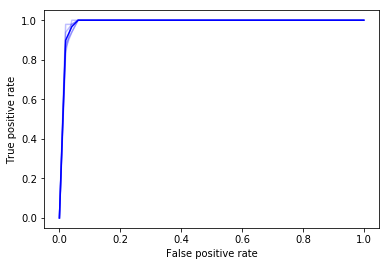

AUC for the logistic model: 0.975840459067981


In [182]:
lg_curves = utils.cross_validate(X, y, models.logistic)
utils.plot_roc_curves(lg_curves)
print(f'AUC for the logistic model: {utils.auc(curves)}')

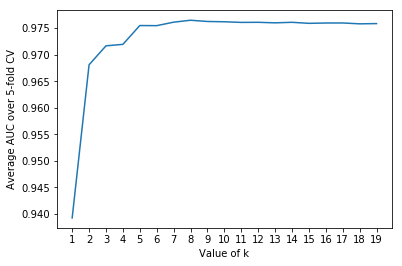

In [181]:
AUCs = [0] * 20
for nbors in range(1,20):
    curves = utils.cross_validate(X, y, models.knn, params=(nbors,))
    AUCs[nbors] = utils.auc(curves)

plt.plot(range(1,20), AUCs[1:20])
plt.xticks(range(1,20))
plt.xlabel('Value of k')
plt.ylabel('Average AUC over 5-fold CV')
plt.show()

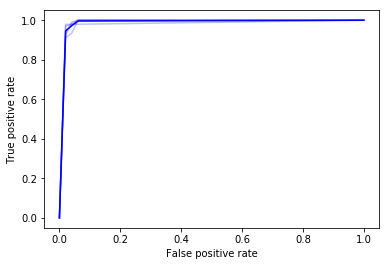

Best AUC for knn: 0.975840459067981


In [180]:
knn_curves = utils.cross_validate(X, y, models.knn, params=(8,))
utils.plot_roc_curves(knn_curves)
print(f'Best AUC for knn: {utils.auc(curves)}')

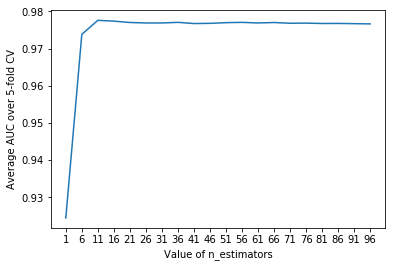

In [185]:
params = range(1,100,5)
AUCs = [0] * len(params)
for i,n_estimators in enumerate(params):
    curves = utils.cross_validate(X, y, models.rf, params=(n_estimators,))
    AUCs[i] = utils.auc(curves)

plt.plot(params, AUCs)
plt.xticks(params)
plt.xlabel('Value of n_estimators')
plt.ylabel('Average AUC over 5-fold CV')
plt.show()

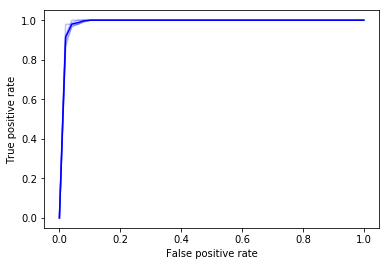

Best AUC for random forest: 0.9766513989541394


In [186]:
rf_curves = utils.cross_validate(X, y, models.rf, params=(11,))
utils.plot_roc_curves(rf_curves)
print(f'Best AUC for random forest: {utils.auc(curves)}')

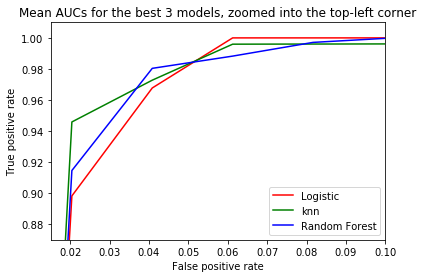

In [188]:
for curves, color,label in zip(
    [lg_curves, knn_curves, rf_curves], 
    ['r','g','b'], 
    ['Logistic', 'knn', 'Random Forest']):
    utils.plot_roc_curves(curves, color=color, mean_only=True, show=False, label=label)
    
plt.xlim(0.015, 0.1)
plt.ylim(0.87,1.01)
plt.legend(loc='lower right')
plt.title('Mean AUCs for the best 3 models, zoomed into the top-left corner')
plt.show()

In [200]:
for model, params, label in zip(
    [models.logistic, models.knn, models.rf],
    [None, (8,), (11,)],
    ['Logistic', 'knn', 'Random Forest']
):
    print(f'Confusion matrix for {label}: \n{utils.confusion_matrix(X, y, model, params=params)}')

Confusion matrix for Logistic: 
[[84  3]
 [ 3 47]]
Confusion matrix for knn: 
[[84  3]
 [ 3 47]]
Confusion matrix for Random Forest: 
[[84  3]
 [ 2 48]]
